In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [221]:
pd.options.display.float_format = '{:.2f}'.format

In [222]:
df = pd.read_csv(r"C:\Users\Shardul\Sem 4 Mini-Project\case_time_series_1.csv")
df

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30-Jan-20,2020-01-30,1.00,1.00,0.00,0.00,0.00,0.00
1,31-Jan-20,2020-01-31,0.00,1.00,0.00,0.00,0.00,0.00
2,01-Feb-20,2020-02-01,0.00,1.00,0.00,0.00,0.00,0.00
3,02-Feb-20,2020-02-02,1.00,2.00,0.00,0.00,0.00,0.00
4,03-Feb-20,2020-02-03,1.00,3.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
528,11-Jul-21,2021-07-11,nan,nan,nan,nan,nan,nan
529,12-Jul-21,2021-07-12,nan,nan,nan,nan,nan,nan
530,13-Jul-21,2021-07-13,nan,nan,nan,nan,nan,nan
531,14-Jul-21,2021-07-14,nan,nan,nan,nan,nan,nan


In [223]:
from fbprophet import Prophet

In [224]:
df.head()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30-Jan-20,2020-01-30,1.00,1.00,0.00,0.00,0.00,0.00
1,31-Jan-20,2020-01-31,0.00,1.00,0.00,0.00,0.00,0.00
2,01-Feb-20,2020-02-01,0.00,1.00,0.00,0.00,0.00,0.00
3,02-Feb-20,2020-02-02,1.00,2.00,0.00,0.00,0.00,0.00
4,03-Feb-20,2020-02-03,1.00,3.00,0.00,0.00,0.00,0.00


In [225]:
confirmed = df[['Date_YMD', 'Total Confirmed']]
confirmed

,Date_YMD,Total Confirmed
0,2020-01-30,1.00
1,2020-01-31,1.00
2,2020-02-01,1.00
3,2020-02-02,2.00
4,2020-02-03,3.00
...,...,...
528,2021-07-11,nan
529,2021-07-12,nan
530,2021-07-13,nan
531,2021-07-14,nan


In [226]:
death = df[['Date_YMD', 'Total Deceased']]
death

,Date_YMD,Total Deceased
0,2020-01-30,0.00
1,2020-01-31,0.00
2,2020-02-01,0.00
3,2020-02-02,0.00
4,2020-02-03,0.00
...,...,...
528,2021-07-11,nan
529,2021-07-12,nan
530,2021-07-13,nan
531,2021-07-14,nan


In [227]:
recovered = df[['Date_YMD', 'Total Recovered']]
recovered

,Date_YMD,Total Recovered
0,2020-01-30,0.00
1,2020-01-31,0.00
2,2020-02-01,0.00
3,2020-02-02,0.00
4,2020-02-03,0.00
...,...,...
528,2021-07-11,nan
529,2021-07-12,nan
530,2021-07-13,nan
531,2021-07-14,nan


In [228]:
confirmed.columns = ['ds', 'y']

In [229]:
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed

<ipython-input-229-8c9c1ad34e00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed['ds'] = pd.to_datetime(confirmed['ds'])


,ds,y
0,2020-01-30,1.00
1,2020-01-31,1.00
2,2020-02-01,1.00
3,2020-02-02,2.00
4,2020-02-03,3.00
...,...,...
528,2021-07-11,nan
529,2021-07-12,nan
530,2021-07-13,nan
531,2021-07-14,nan


In [230]:
model = Prophet(interval_width=0.98,  yearly_seasonality=True)

In [231]:
model.fit(confirmed)

In [232]:
future = pd.read_csv(r"C:\Users\Shardul\Sem 4 Mini-Project\case_time_series_1.csv")
future = future[['Date_YMD']]
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])
future.dropna(inplace=True)
future

,ds
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03
...,...
528,2021-07-11
529,2021-07-12
530,2021-07-13
531,2021-07-14


In [233]:
forecast_confirmed = model.predict(future)
forecast_confirmed[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(25)

,ds,yhat,yhat_lower,yhat_upper
508,2021-06-21,28205902.20,24389770.80,32542387.59
509,2021-06-22,28361125.82,24437709.61,32829998.59
510,2021-06-23,28517676.94,24420725.11,33111469.07
511,2021-06-24,28673666.23,24469453.94,33418599.54
512,2021-06-25,28824309.41,24546822.58,33650626.25
513,2021-06-26,28979523.95,24588768.04,33950917.67
514,2021-06-27,29134884.07,24610270.62,34221550.30
515,2021-06-28,29283983.55,24620146.63,34421723.51
516,2021-06-29,29436144.05,24661055.59,34665149.23
517,2021-06-30,29590309.45,24646956.14,34920918.32


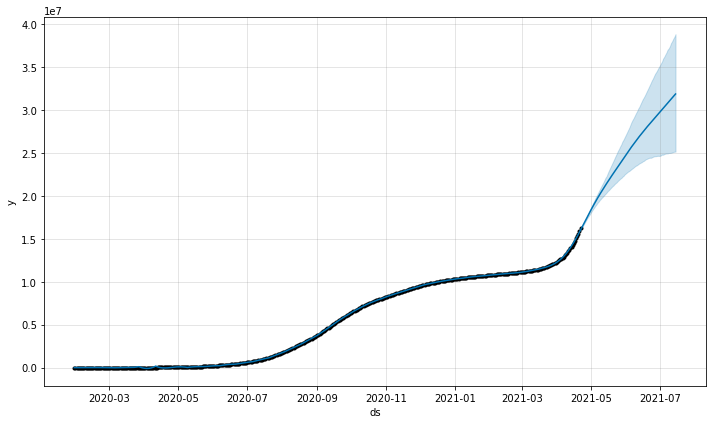

In [234]:
pred_plot = model.plot(forecast_confirmed)

In [249]:
death

,ds,y
0,2020-01-30,0.00
1,2020-01-31,0.00
2,2020-02-01,0.00
3,2020-02-02,0.00
4,2020-02-03,0.00
...,...,...
444,2021-04-18,178202.00
445,2021-04-19,179959.00
446,2021-04-20,181980.00
447,2021-04-21,184081.00


In [236]:
death.columns = ['ds', 'y']
death.dropna(inplace=True)
death

<ipython-input-236-1f3ebdf9cf0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death.dropna(inplace=True)


,ds,y
0,2020-01-30,0.00
1,2020-01-31,0.00
2,2020-02-01,0.00
3,2020-02-02,0.00
4,2020-02-03,0.00
...,...,...
444,2021-04-18,178202.00
445,2021-04-19,179959.00
446,2021-04-20,181980.00
447,2021-04-21,184081.00


In [237]:
model2 = Prophet(interval_width=0.98,  yearly_seasonality=True)

In [238]:
model2.fit(death)

In [239]:
future2 = pd.read_csv(r"C:\Users\Shardul\Sem 4 Mini-Project\case_time_series_1.csv")
future2 = future2[['Date_YMD']]
future2.columns = ['ds']
future2['ds'] = pd.to_datetime(future2['ds'])
future2.dropna(inplace=True)
future2

,ds
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03
...,...
528,2021-07-11
529,2021-07-12
530,2021-07-13
531,2021-07-14


In [240]:
forecast_death = model2.predict(future2)
forecast_death[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(25)

,ds,yhat,yhat_lower,yhat_upper
508,2021-06-21,267194.27,238935.23,292572.94
509,2021-06-22,268510.39,239665.92,294801.80
510,2021-06-23,269805.86,239752.09,296639.37
511,2021-06-24,271100.40,240103.03,298899.77
512,2021-06-25,272347.82,240655.61,300602.20
513,2021-06-26,273613.73,241165.23,302390.27
514,2021-06-27,274870.38,241544.62,304539.93
515,2021-06-28,276102.15,241988.90,306914.39
516,2021-06-29,277401.28,242530.14,308816.06
517,2021-06-30,278683.44,243254.48,310211.29


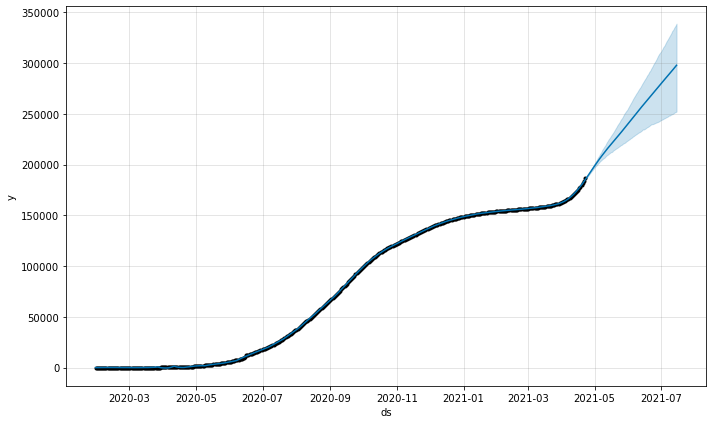

In [241]:
pred_plot_2 = model2.plot(forecast_death)

In [250]:
recovered

,ds,y
0,2020-01-30,0.00
1,2020-01-31,0.00
2,2020-02-01,0.00
3,2020-02-02,0.00
4,2020-02-03,0.00
...,...,...
444,2021-04-18,12948820.00
445,2021-04-19,13103177.00
446,2021-04-20,13269833.00
447,2021-04-21,13449260.00


In [243]:
recovered.columns = ['ds', 'y']
recovered.dropna(inplace=True)
recovered

<ipython-input-243-b80a1ed2c04b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recovered.dropna(inplace=True)


,ds,y
0,2020-01-30,0.00
1,2020-01-31,0.00
2,2020-02-01,0.00
3,2020-02-02,0.00
4,2020-02-03,0.00
...,...,...
444,2021-04-18,12948820.00
445,2021-04-19,13103177.00
446,2021-04-20,13269833.00
447,2021-04-21,13449260.00


In [244]:
model3 = Prophet(interval_width=0.98,  yearly_seasonality=True)

In [245]:
model3.fit(recovered)

In [246]:
future3 = pd.read_csv(r"C:\Users\Shardul\Sem 4 Mini-Project\case_time_series_1.csv")
future3 = future3[['Date_YMD']]
future3.columns = ['ds']
future3['ds'] = pd.to_datetime(future3['ds'])
future3.dropna(inplace=True)
future3

,ds
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03
...,...
528,2021-07-11
529,2021-07-12
530,2021-07-13
531,2021-07-14


In [247]:
forecast_recovered = model3.predict(future3)
forecast_recovered[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(25)

,ds,yhat,yhat_lower,yhat_upper
508,2021-06-21,20423822.32,17768393.49,23077561.32
509,2021-06-22,20517021.70,17799530.86,23204381.55
510,2021-06-23,20610274.81,17822058.72,23353704.21
511,2021-06-24,20703803.35,17843070.46,23501071.71
512,2021-06-25,20794250.79,17855746.89,23657182.78
513,2021-06-26,20887992.82,17868295.52,23855021.49
514,2021-06-27,20980426.68,17900646.74,23969675.52
515,2021-06-28,21074283.04,17923137.27,24133660.53
516,2021-06-29,21167369.13,17935939.70,24299194.02
517,2021-06-30,21260668.56,17947023.17,24456706.41


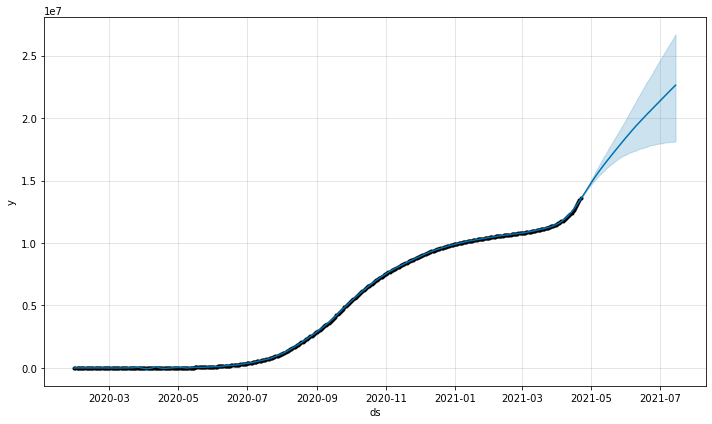

In [248]:
pred_plot_3 = model3.plot(forecast_recovered)